In [358]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [365]:
x_s = np.linspace(0, 5, num=100)
n = 5
y_s = np.array([pipeline_v100.simulation(n=n, 
                                         a_x= 1, 
                                         h_z= x, 
                                         delta = 0.04,
                                         #m = 2**(n-1),
                                         m = 4,
                                         DEBUG=True) for x in x_s])

Fidelity F = (0.9985635071302509+0.00016672648458007655j)

Fidelity F = (0.9985846162433296+1.4068848123957323e-05j)

Fidelity F = (0.9986196204755103-0.00013838621070000798j)

Fidelity F = (0.9986804268723013-5.789138215093319e-05j)

Fidelity F = (0.9987560221340954-4.8581965183967344e-05j)

Fidelity F = (0.9986415212706665+6.575351771888639e-05j)

Fidelity F = (0.9986496886849457+5.906605804974624e-05j)

Fidelity F = (0.998612275331577+3.662299622252761e-05j)

Fidelity F = (0.9986107953163178+3.0506490138896245e-05j)

Fidelity F = (0.9986778495710879+1.91003719714802e-06j)

Fidelity F = (0.9986564293827006-8.387472003880553e-05j)

Fidelity F = (0.9986501799544191+7.335629999123433e-05j)

Fidelity F = (0.9986432515953831-7.774486040885761e-05j)

Fidelity F = (0.9986417200580564+2.5515475745988694e-05j)

Fidelity F = (0.9985579764759319+0.00019646427226141131j)

Fidelity F = (0.9985390900217419+6.182750067660613e-05j)

Fidelity F = (0.9986598530395042-1.8786278155972335e-05j)

Fidelity

In [366]:
y_s[0]

{'fidelity_truncated': 0.5842600329873129,
 'fidelity_generalized': (0.5842600329873132-1.7281642799101788e-19j),
 'lower_tqfi': (2078.699835063434+8.640821399550894e-16j),
 'upper_tqfi': 2078.6998350634353,
 'true_fidelity': 0.9985635071302509285,
 'true_qfi': 7.182464348745357284,
 'sub_qfi_bound': 8.950023387613859,
 'super_qfi_bound': 4.632738131807312,
 'trace_rho': (0.9999999999999998+0j),
 'trace_rho_delta': (0.9999999999999998+1.9096500058562506e-19j),
 'purity_rho': (0.5865890947840968+0j),
 'purity_rho_delta': (0.5856348947485508-6.890613025913733e-19j),
 'rank_rho': 2,
 'rank_rho_delta': 2}

In [367]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
true_qfi = np.array([np.real(x["true_qfi"]) for x in y_s ])
true_fidelity = np.array([np.real(x["true_fidelity"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])


error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

1.0673656764234745e-13


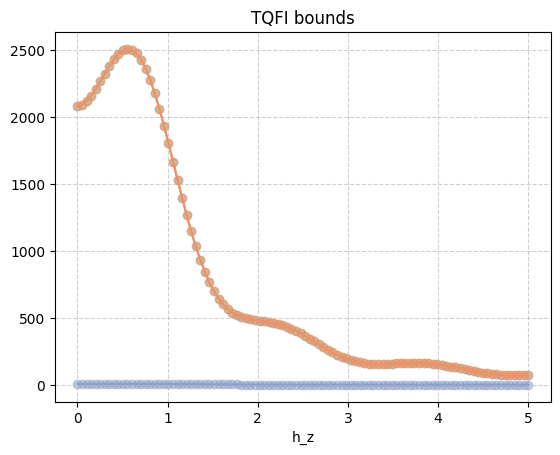

In [368]:
plt.scatter(x_s, lower_tqfi, alpha=0.5)
plt.plot(x_s, lower_tqfi)
plt.scatter(x_s, (upper_tqfi), alpha=0.5)
plt.plot(x_s, (upper_tqfi))
plt.scatter(x_s, (true_qfi), alpha=0.5)
plt.plot(x_s, (true_qfi))
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

In [369]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 0.5555555555555556


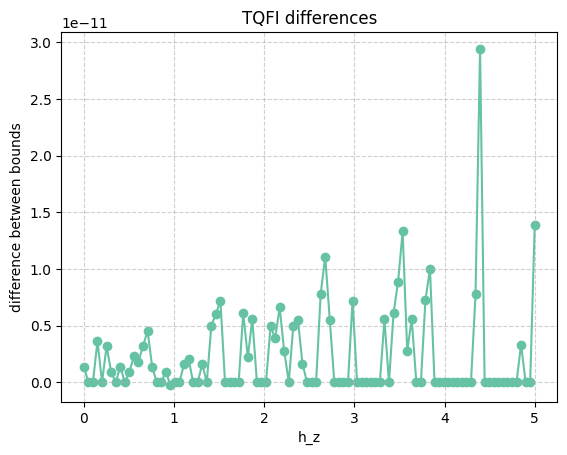

In [370]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

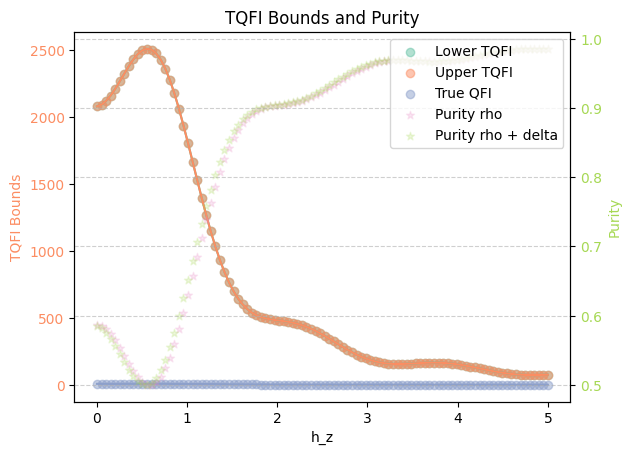

In [371]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, alpha=0.5, label="Upper TQFI", color =  palette[1])
ax1.plot(x_s, upper_tqfi)
ax1.scatter(x_s, true_qfi, alpha=0.5, label="True QFI", color = palette[2])
ax1.plot(x_s, true_qfi)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


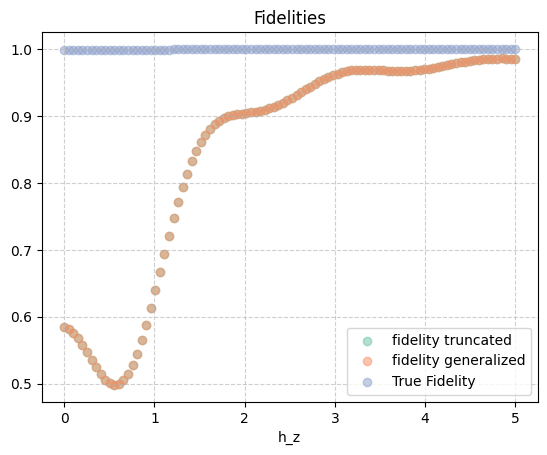

In [372]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, fidelity_truncated, alpha=0.5, label="fidelity truncated", color =  palette[0])
ax1.scatter(x_s, fidelity_generalized, alpha=0.5, label="fidelity generalized", color =  palette[1])
ax1.scatter(x_s, true_fidelity, alpha=0.5, label="True Fidelity", color = palette[2])
ax1.set_xlabel("h_z")
ax1.legend()

plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()


In [373]:
np.min(true_fidelity)

0.9985390900217418781

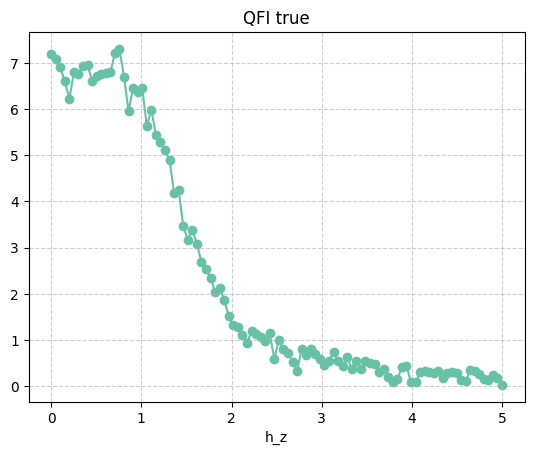

In [374]:
plt.scatter(x_s,true_qfi)
plt.plot(x_s,true_qfi)
plt.xlabel("h_z")
plt.title("QFI true")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


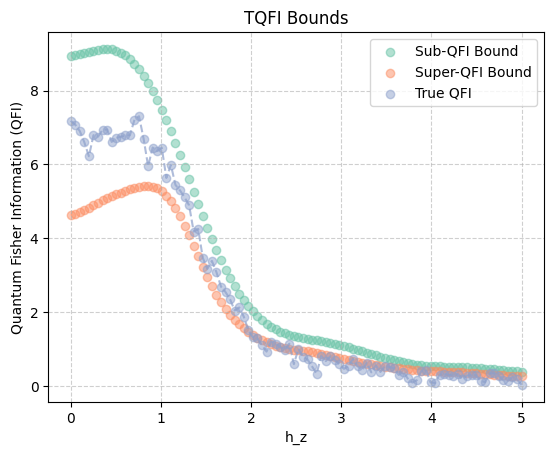

In [375]:
plt.scatter(x_s, sub_qfi_bound, alpha=0.5, label="Sub-QFI Bound", color=palette[0])
plt.scatter(x_s, super_qfi_bound, alpha=0.5, label="Super-QFI Bound", color=palette[1])
plt.scatter(x_s, true_qfi, alpha=0.5, label="True QFI", color=palette[2])
plt.plot(x_s, true_qfi, linestyle="dashed", color=palette[2], alpha=0.7)

plt.title("TQFI Bounds")
plt.xlabel("h_z")
plt.ylabel("Quantum Fisher Information (QFI)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

plt.show()


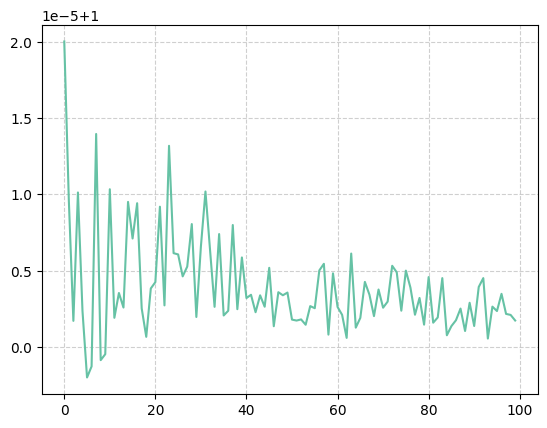

In [354]:
plt.plot(true_fidelity)
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability